In [1]:
# 四、逻辑回归
# 对数字0的图片进行一元分类

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [3]:
# 附:加载数据函数(复制使用,需要放置指定数据集图片到指定目录)
def load_dataset(dataset_path):
    images = []
    targets = []

    path_root = os.listdir(dataset_path)
    for path_root_dir in path_root: # 目录下
        path_root_x = dataset_path + path_root_dir + '/'
        path_root_root = os.listdir(path_root_x)    # 子目录下
        train_sets_path = [path_root_x + filename for filename in path_root_root]
        for path in train_sets_path:
            image = Image.open(path)    # 加载图片
            image_array = np.array(image)   # 转为矩阵
            image_array_ravel = image_array.ravel() # 改变形状
            image_array_ravel_scale = image_array_ravel / 255   # 缩放
            images.append(image_array_ravel_scale)

            l = path.split('/')
            targets.append(1.0 if l[-2] == '0' else 0.0) # 不属于数字0的目录下的图片，结果都设为0
            
    X = np.stack(images)                 # 取出训练数据
    Y = np.array(targets, ndmin=2).T     # 取出数据集结果
    
    return X, Y

In [4]:
# 加载数据
train_dataset_path = '../datasets/digital_datasets/train_images/'
test_dataset_path = '../datasets/digital_datasets/test_images/'
X_train, Y_train = load_dataset(train_dataset_path)
X_test, Y_test = load_dataset(test_dataset_path)

# 设置超参数
learning_rate = 0.05
count = 1000
costs = []

In [5]:
# 1.定义神经网络的结构和前向传播的输出结果
W = tf.Variable(tf.random_normal([X_train.shape[1], 1], stddev=1, seed=1) * 0.01, name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')
X = tf.placeholder(shape=[None, X_train.shape[1]], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 前向传播
Z = tf.matmul(X, W) + b
y = tf.sigmoid(Z)

In [6]:
# 2.定义损失函数以及选择反向传播优化的算法
loss = -tf.reduce_mean(Y * tf.log(tf.clip_by_value(y, 1e-10, 1.0))
                      + (1 - Y) * tf.log(tf.clip_by_value(1 - y, 1e-10, 1.0))
#                       + tf.contrib.layers.l2_regularizer(0.01)(W)    # regularize,0.01:lambda
                      )
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [7]:
# 3.生成会话并且在训练数据上反复运行反向传播优化算法
# with tf.Session() as sess:    # 后面画图需要sess,暂时不close
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(count):
    _, _cost = sess.run([train_step, loss], feed_dict={X:X_train, Y:Y_train})
    costs.append(_cost)

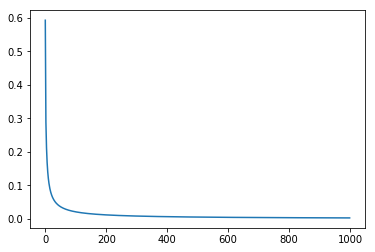

逻辑归回的准确率为:100.000000


In [8]:
# 绘图
# 迭代代价图
plt.plot([x for x in range(count)], costs)
plt.show()
# 显示准确率
predicted = np.round(sess.run(y, feed_dict={X:X_train}))    # 预测
predicted = predicted.astype(np.int)
print('逻辑归回的准确率为:%f' % (np.mean(np.equal(Y_train, predicted)) * 100))
sess.close()    # 最后手动关闭